### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

Se recopilaron datos de 500 estudiantes de preparatoria sobre el número de libros completos que leyeron durante un semestre. Esto ayudará a entender los hábitos de lectura y fomentar mejores estrategias educativas.
Los valores posibles varían entre 0 (no leyeron nada) y 20 libros (muy lectores).

### 1: Datos cuantitativos discretos 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuración estética
plt.style.use('ggplot')

# Generar 500 datos aleatorios (número de libros leídos)
np.random.seed(42)  # Para reproducibilidad
datos = np.random.poisson(lam=5, size=500)  # Media ~5 libros
datos = np.clip(datos, 0, 20)  # Limitar a entre 0 y 20 libros

### 2: Tabla de frecuencias

In [2]:
# Crear tabla de frecuencias
tabla = pd.Series(datos).value_counts().sort_index()
frecuencia_absoluta = tabla
frecuencia_relativa = (tabla / tabla.sum()).round(4)
frecuencia_acumulada = tabla.cumsum()

# Mostrar tabla
tabla_frecuencias = pd.DataFrame({
    "Libros leídos": tabla.index,
    "Frecuencia Absoluta": frecuencia_absoluta.values,
    "Frecuencia Relativa": frecuencia_relativa.values,
    "Frecuencia Acumulada": frecuencia_acumulada.values
})

print("Tabla de Frecuencias")
display(tabla_frecuencias)

Tabla de Frecuencias


,Libros leídos,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,0,3,0.006,3
1,1,23,0.046,26
2,2,47,0.094,73
3,3,66,0.132,139
4,4,82,0.164,221
5,5,87,0.174,308
6,6,66,0.132,374
7,7,51,0.102,425
8,8,43,0.086,468
9,9,14,0.028,482


### 3: Gráficos
#### 1. Histograma (frecuencia absoluta)

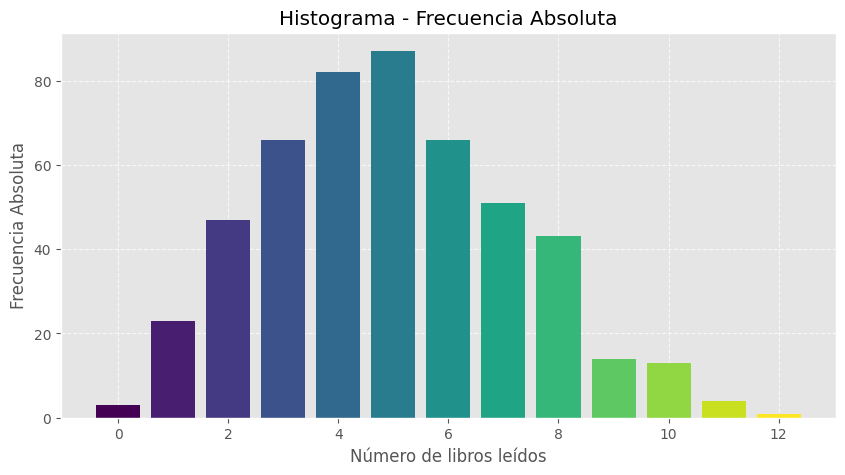

In [3]:
# Histograma (Frecuencia Absoluta)
plt.figure(figsize=(10, 5))
plt.bar(tabla.index, frecuencia_absoluta.values, color=plt.cm.viridis(np.linspace(0, 1, len(tabla))))
plt.xlabel("Número de libros leídos")
plt.ylabel("Frecuencia Absoluta")
plt.title("Histograma - Frecuencia Absoluta")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### 2. Diagrama de barras horizontales (frecuencia absoluta)

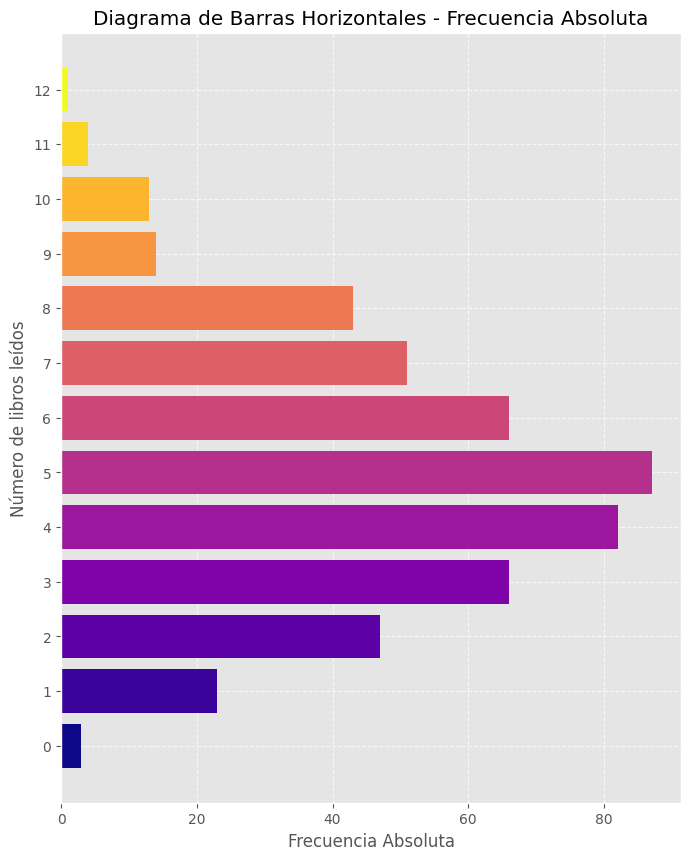

In [4]:

# Diagrama de Barras Horizontales (Frecuencia Absoluta)
plt.figure(figsize=(8, 10))
plt.barh(tabla.index.astype(str), frecuencia_absoluta.values, color=plt.cm.plasma(np.linspace(0, 1, len(tabla))))
plt.xlabel("Frecuencia Absoluta")
plt.ylabel("Número de libros leídos")
plt.title("Diagrama de Barras Horizontales - Frecuencia Absoluta")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### 3. Polígono de frecuencia (frecuencia relativa)

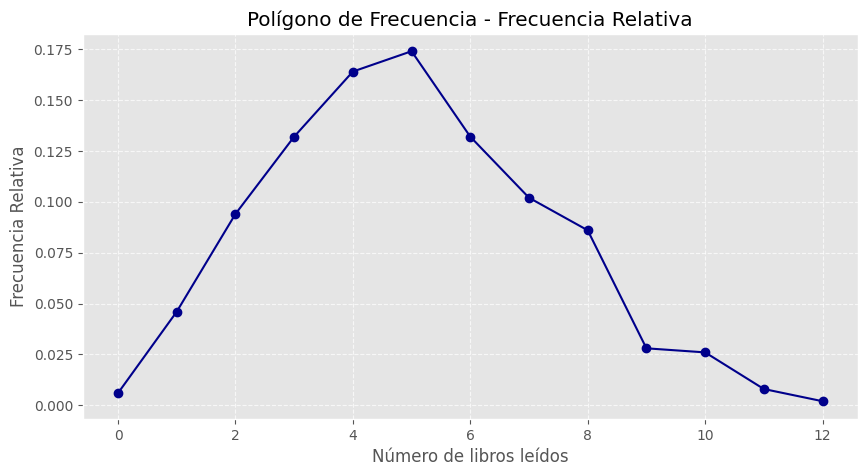

In [5]:
# Polígono de Frecuencia (Frecuencia Relativa)
plt.figure(figsize=(10, 5))
plt.plot(tabla.index, frecuencia_relativa.values, marker='o', linestyle='-', color='darkblue')
plt.xlabel("Número de libros leídos")
plt.ylabel("Frecuencia Relativa")
plt.title("Polígono de Frecuencia - Frecuencia Relativa")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

 #### 4. Diagrama de pastel (frecuencia relativa)

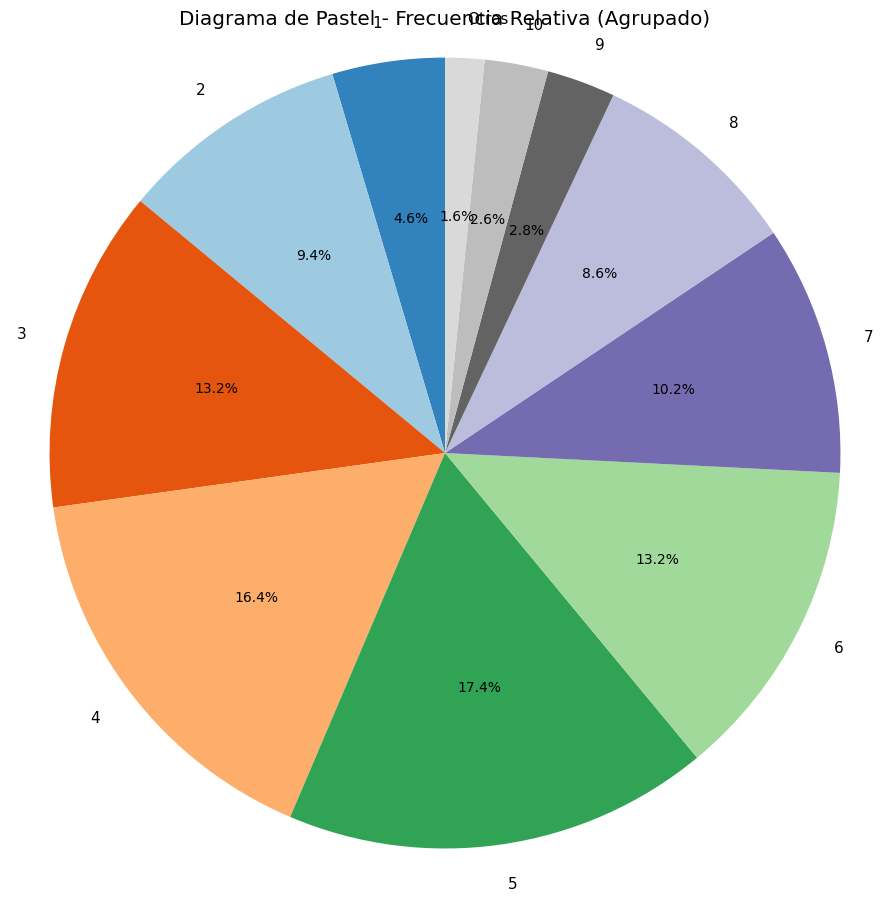

In [6]:
# Agrupar categorías menores al 2% como "Otros"
frecuencia_relativa_redondeada = frecuencia_relativa.copy()
otros = frecuencia_relativa_redondeada[frecuencia_relativa_redondeada < 0.02].sum()
frecuencia_relativa_filtrada = frecuencia_relativa_redondeada[frecuencia_relativa_redondeada >= 0.02]
frecuencia_relativa_filtrada["Otros"] = otros

# Etiquetas y valores
labels = frecuencia_relativa_filtrada.index.astype(str)
sizes = frecuencia_relativa_filtrada.values

# Gráfico de pastel mejorado
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    textprops=dict(color="black"),
    colors=plt.cm.tab20c(np.linspace(0, 1, len(sizes)))
)

# Mejorar presentación del texto
for text in autotexts:
    text.set_fontsize(10)
for t in texts:
    t.set_fontsize(11)

plt.title("Diagrama de Pastel - Frecuencia Relativa (Agrupado)")
plt.axis('equal')  # Para mantener el círculo
plt.tight_layout()
plt.show()


#### 5. Ojiva (frecuencia acumulada)

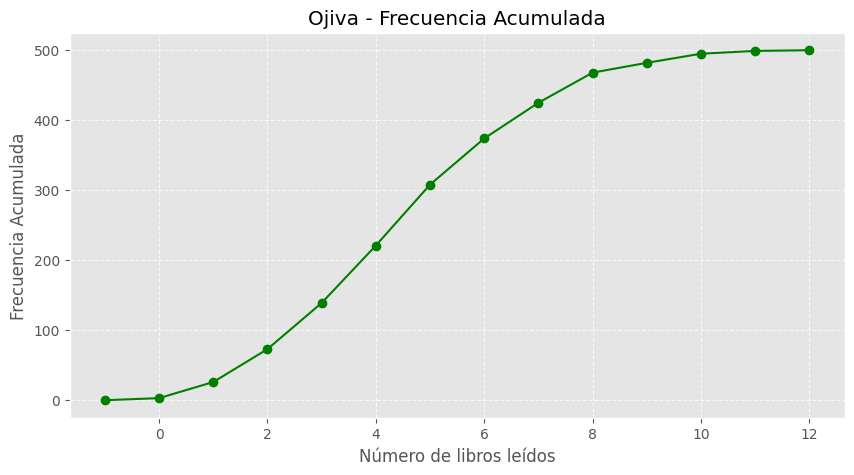

In [7]:
# Ojiva (Frecuencia Acumulada desde 0)
frecuencia_acumulada_con_0 = np.insert(frecuencia_acumulada.values, 0, 0)
clases_con_0 = np.insert(tabla.index.values, 0, tabla.index.values[0]-1)

plt.figure(figsize=(10, 5))
plt.plot(clases_con_0, frecuencia_acumulada_con_0, marker='o', linestyle='-', color='green')
plt.xlabel("Número de libros leídos")
plt.ylabel("Frecuencia Acumulada")
plt.title("Ojiva - Frecuencia Acumulada")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()